# معالجة اللغات الطبيعية

In [502]:
import pandas as pd # for basic data operations
import numpy as np # also for basic data operations
import re # to use the regex function 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import style # to set style for our plots and here we use ggplot 
style.use('ggplot')
from textblob import TextBlob # to process the textual data
from nltk.tokenize import word_tokenize # to perform tokenization
from nltk.stem import PorterStemmer # to perform stemming 
from nltk.corpus import stopwords # to remove the stop words
stop_words = set(stopwords.words('english')) # stating the stop words as english
from wordcloud import WordCloud # to plot the word clouds
from sklearn.feature_extraction.text import CountVectorizer # to vectorize a text document
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split # to split the data into training data and test data
from sklearn.svm import SVC  #to perform SVC algorithm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # those are different evaluation matrixes used to evaluate the model 


In [503]:
# قراءة ملف CSV
data = pd.read_csv("Twitter Sentiments.csv")
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


## المعالجة المسبقة للتغريدات وتنظيفها

In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [505]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [506]:
tweet_df = data.drop(['id', 'label'], axis = 1)
tweet_df.head()

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


In [507]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



In [508]:
def data_processing(tweet):
    tweet = tweet.lower() # perform lowercase conversion
    tweet = re.sub(r"https\S+|www\S+https\S+", '',tweet, flags=re.MULTILINE) #remove the urlin our tweets using the regex function 
    tweet = re.sub(r'\@w+|\#','',tweet) # remove the hashtag 
    tweet = re.sub(r'[^\w\s]','',tweet) # remove the punctuations using regex function
    # remove the stop words
    tweet_tokens = word_tokenize(tweet)
    filtered_tweet = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweet)

In [509]:
# apply preprocessing function on the tweets data
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [510]:
# remove any duplicate data and the tweet by using the drop duplicate method 
tweet_df = tweet_df.drop_duplicates('tweet')

stemming is a valuable text preprocessing technique that can benefit machine learning models in NLP tasks. However, it's important to be aware of its limitations and consider alternatives like lemmatization depending on the specific task and dataset characteristics.

In [511]:
# perform stemming on the data by uas a porter's demo as stemmer type
stemmer = PorterStemmer()
def stemming(data):
    tweet = [stemmer.stem(word) for word in data]
    return data

In [512]:
# apply the stem into the process tweets
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: stemming(x))


In [513]:
tweet_df.head()

,tweet
0,user father dysfunctional selfish drags kids d...
1,user user thanks lyft credit cant use cause do...
2,bihday majesty
3,model love u take u time urð ðððð ððð
4,factsguide society motivation


In [514]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

user father dysfunctional selfish drags kids dysfunction run 

user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked 

bihday majesty 

model love u take u time urð ðððð ððð 

factsguide society motivation 



In [515]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29373 entries, 0 to 31961
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   29373 non-null  object
dtypes: object(1)
memory usage: 459.0+ KB


the observiation have been reduced from 31962  to 29373

### Now our data is preprocessed and ready to be used 

## استكشاف التغريدات وفهمها

In [516]:
tweet_df['label'] = data['label']

In [517]:
def state(label):
    if label ==0:
        return "Positive"
    elif label == 1:
        return "Negative"

In [518]:
tweet_df['state'] = tweet_df['label'].apply(state)

<Axes: xlabel='state', ylabel='count'>

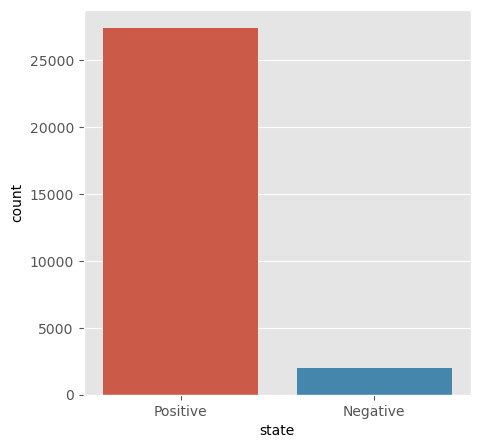

In [519]:
fig = plt.figure(figsize = (5,5))
sns.countplot(x = 'state', data = tweet_df)

Text(0.5, 1.0, 'Distribution of tweets sate')

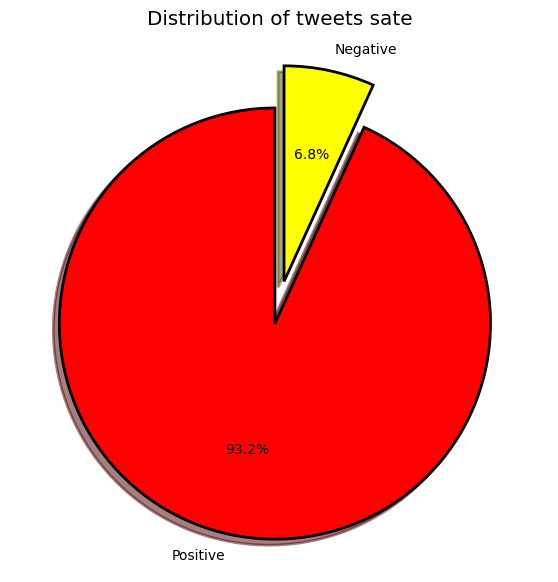

In [520]:
# pie chart
fig = plt.figure(figsize=(7,7))
colors = ('red', 'yellow')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = tweet_df['state'].value_counts()
explode =(0.1,0.1)
tags.plot(kind ='pie', autopct = '%1.1f%%', shadow =True, colors = colors, startangle = 90, wedgeprops =wp, explode = explode, label='')
plt.title("Distribution of tweets sate")

In [521]:
# the top five tweets for each states of tweets starting with positive sate
pos_tweets = tweet_df[tweet_df.state == 'Positive']
pos_tweets = pos_tweets.sort_values(['label'], ascending = False)
pos_tweets.head()

,tweet,label,state
0,user father dysfunctional selfish drags kids d...,0,Positive
21067,cant wait skyrim special edition trailer e3 20...,0,Positive
21065,retweeted nicla colonna user photo vanity mate...,0,Positive
21064,2 weeks away cant wait couyard,0,Positive
21063,gon na visit best friend california next month...,0,Positive


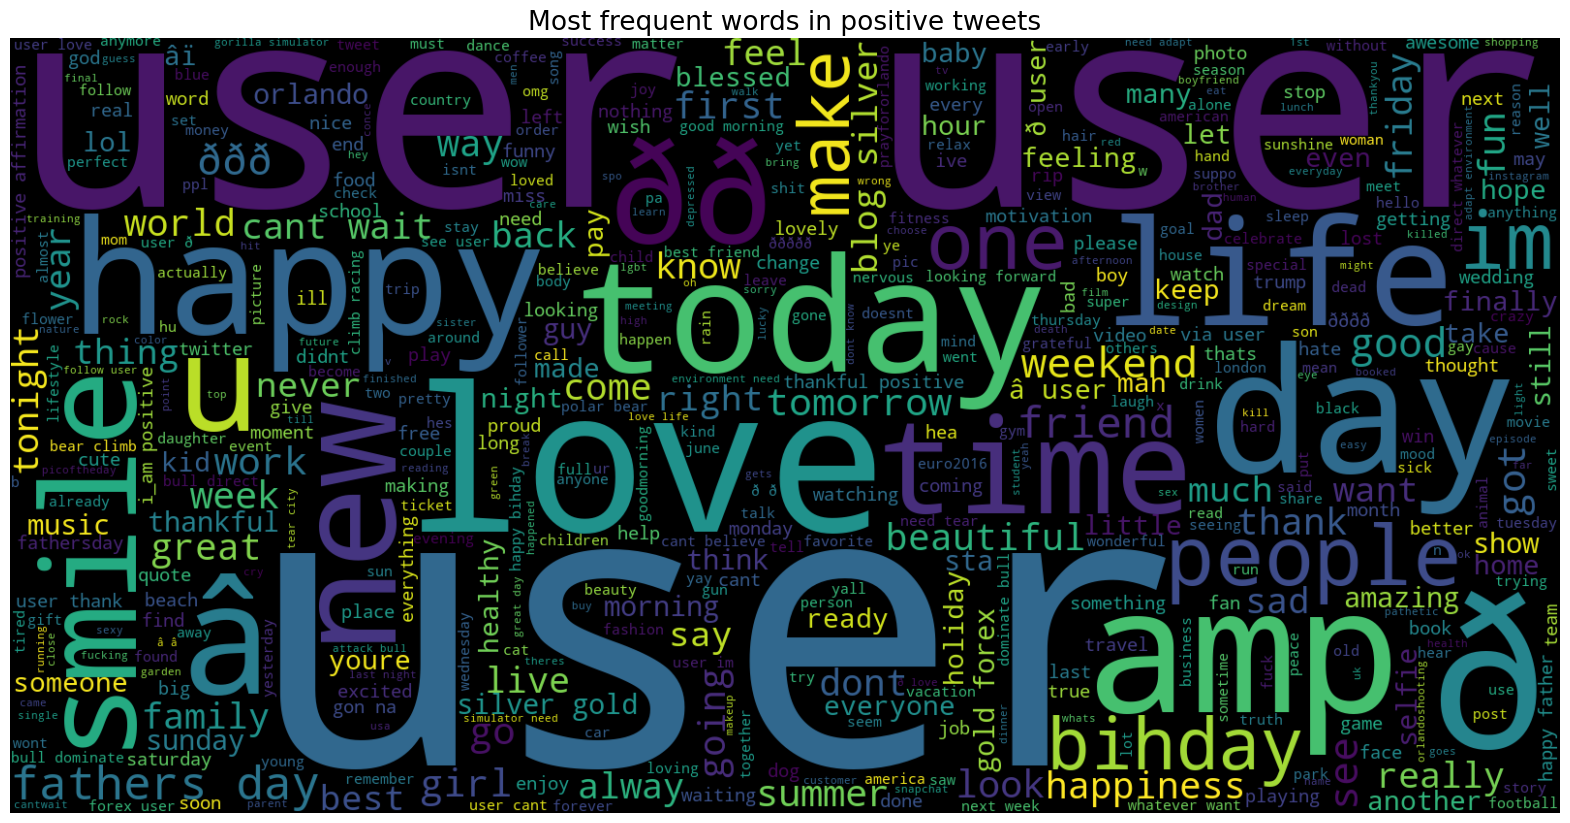

In [522]:
# use a word plot to visualize all the positive tweets
tweet = ' '.join([word for word in pos_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words = 500, width =1600, height = 800).generate(tweet)
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.title("Most frequent words in positive tweets", fontsize = 19)
plt.show()

In [523]:
#the top five tweets for each states of tweets starting with Negative sate
neg_tweets = tweet_df[tweet_df.state == 'Negative']
neg_tweets = neg_tweets.sort_values(['label'], ascending = False)
neg_tweets.head()

,tweet,label,state
13,user cnn calls michigan middle school build wa...,1,Negative
21256,pulled chain stoptalking sob auspol,1,Negative
21394,user user ends 2016 hopeful message music indu...,1,Negative
21368,latest seattle daily thanks user seahawks,1,Negative
21366,user grows uk brexit buggeroffboris bregret uk...,1,Negative


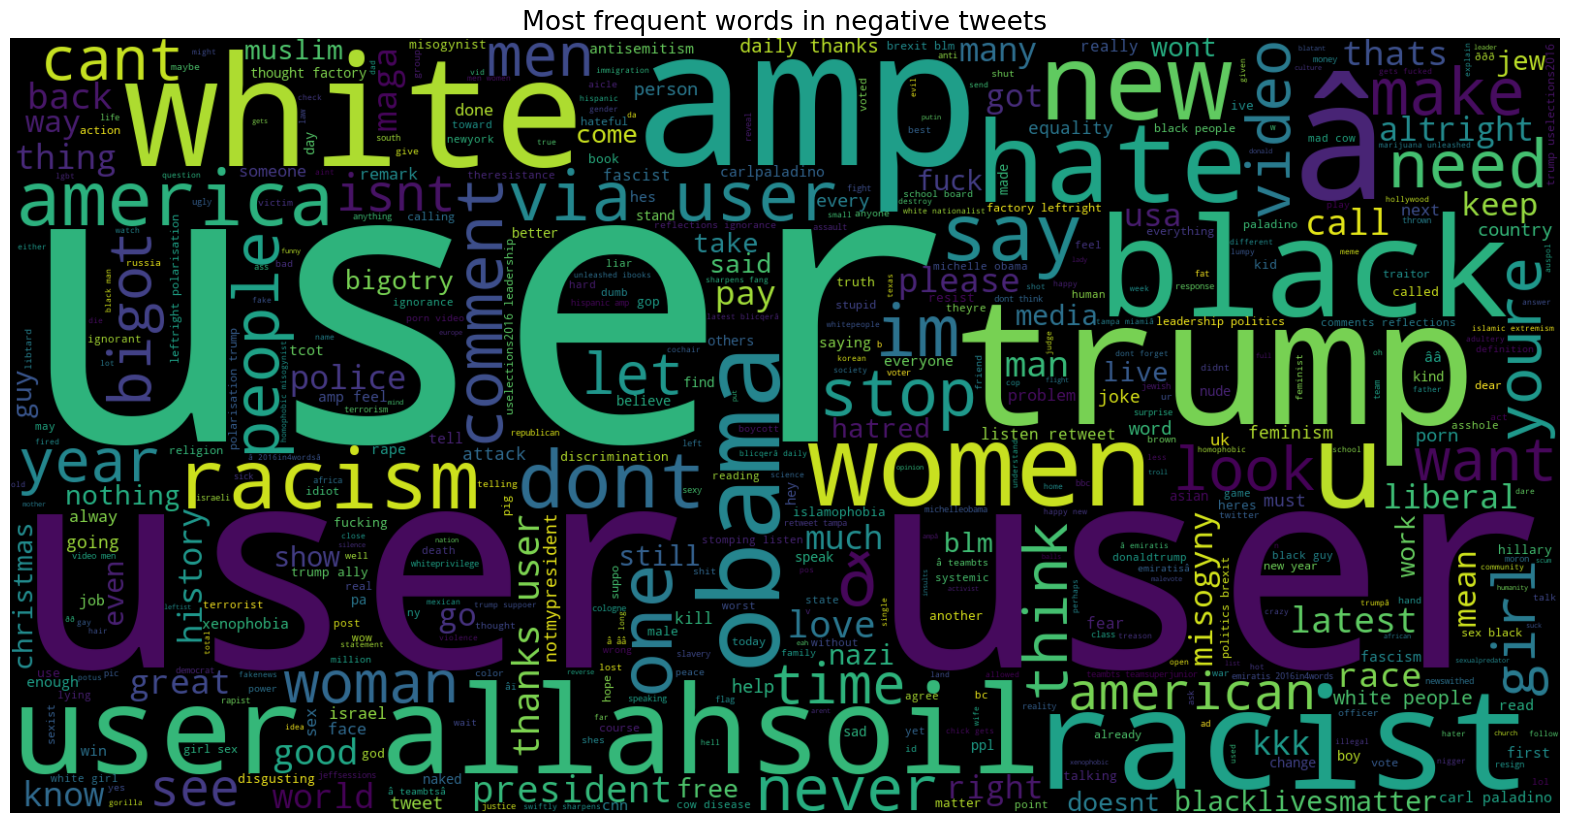

In [524]:
# use a word plot to visualize all the negative tweets
tweet = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words = 500, width =1600, height = 800).generate(tweet)
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.title("Most frequent words in negative tweets", fontsize = 19)
plt.show()

##  استخلاص الميزات الرقمية بطرق مختلفة

### count vectorizer

In [525]:
vect = CountVectorizer()  # Create the CountVectorizer object
X = vect.fit_transform(tweet_df['tweet'])  # Fit and transform the text data

feature_names = vect.get_feature_names_out()  # Use get_feature_names_out

print("number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

number of features: 44999

First 20 features:
 ['0000001' '00027' '001' '0035' '00h30' '01' '0115' '0161' '019'
 '01926889917' '02' '0265' '0266808099' '02900' '03' '030916'
 '03111880779' '032' '033' '0345']


### TF - IDF

In [526]:
#TF-IDF
vect2 = TfidfVectorizer()
feature_names2 = vectorizer.fit_transform(tweet_df['tweet'])
number_of_features = feature_names2.getnnz()
print("number of features (non-zero elements):", number_of_features)
print("First 20 features:\n {}".format(feature_names2[:20]))

number of features (non-zero elements): 239602
First 20 features:
   (0, 40596)	1
  (0, 13974)	1
  (0, 12258)	1
  (0, 34153)	1
  (0, 11922)	1
  (0, 21592)	1
  (0, 12257)	1
  (0, 33230)	1
  (1, 40596)	2
  (1, 38242)	1
  (1, 23786)	1
  (1, 9668)	1
  (1, 7161)	1
  (1, 40587)	1
  (1, 7481)	1
  (1, 11736)	1
  (1, 27897)	1
  (1, 42047)	1
  (1, 40752)	1
  (1, 29195)	1
  (1, 11306)	1
  (1, 16109)	1
  (2, 5226)	1
  (2, 24004)	1
  (3, 25448)	1
  :	:
  (14, 38355)	1
  (15, 28483)	1
  (15, 2851)	1
  (15, 21197)	1
  (15, 43464)	1
  (15, 28067)	1
  (16, 38232)	2
  (16, 28879)	1
  (16, 30342)	1
  (17, 32584)	1
  (17, 2054)	1
  (18, 40596)	2
  (18, 15292)	1
  (18, 35396)	1
  (18, 3337)	1
  (18, 40922)	1
  (18, 19260)	1
  (18, 9251)	1
  (18, 24015)	1
  (18, 29319)	1
  (19, 21789)	1
  (19, 13156)	1
  (19, 27974)	1
  (19, 23869)	1
  (19, 7889)	1


##  بناء نموذج باستخدام تعلم الآلة فى للتنبوء بالنتائج

In [527]:
# seprate the data into x and y 
x = tweet_df['tweet']
y = tweet_df['state']

In [528]:
# transform the x data 
x=vect.transform(x)

In [529]:
# put the data into training and test data
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size= 0.2, random_state=42)

In [530]:
# print the size of the training and test data 
print(" The size of x_train: ", (x_train.shape))
print(" The size of y_train: ", (y_train.shape))

print(" The size of x_test: ", (x_test.shape))
print(" The size of y_test: ", (y_test.shape))

 The size of x_train:  (23498, 44999)
 The size of y_train:  (23498,)
 The size of x_test:  (5875, 44999)
 The size of y_test:  (5875,)


In [531]:
#train the data on svc model
SVCmod = SVC(kernel="linear")
SVCmod.fit(x_train, y_train)

SVC(kernel='linear')

In [532]:
# test the model 
SVCmod_pred = SVCmod.predict(x_test)

### تقييم نموذج تعلم الآلة

In [533]:
# evaluate the model
SVCmod_acc = accuracy_score(SVCmod_pred, y_test)

In [534]:
#print the accuracy
print("Test accuray: {:.2f}%".format(SVCmod_acc*100))


Test accuray: 95.46%


In [535]:
# confusion matrix and the classification report

print(confusion_matrix(y_test, SVCmod_pred))
print("\n")
ML_cr =classification_report(y_test, SVCmod_pred)
print(ML_cr)

[[ 233  187]
 [  80 5375]]


              precision    recall  f1-score   support

    Negative       0.74      0.55      0.64       420
    Positive       0.97      0.99      0.98      5455

    accuracy                           0.95      5875
   macro avg       0.86      0.77      0.81      5875
weighted avg       0.95      0.95      0.95      5875



## بناء نموذج باستخدام التعلم العميق فى للتنبوءبالنتائج

In [536]:
from keras.preprocessing.text import Tokenizer #breaks down text into individual units of meaning, such as words or characters
from keras.preprocessing.sequence import pad_sequences #deals with the issue of varying sequence lengths in text data
#to define the architecture of your neural network model. 
#It allows you to create a sequential model, where layers are stacked one after another.
from keras.models import Sequential
#Embedding: This layer takes numerical token IDs (created by Tokenizer) as input.
#SimpleRNN: This layer is a type of recurrent neural network (RNN) suitable for processing sequential data like text
#Dense: This layer is a fully-connected layer commonly used in the final stages of neural networks
from keras.layers import Embedding, SimpleRNN, Dense

In [537]:
tweet_train = tweet_df[:20962]
tweet_test = tweet_df[20963:]

In [538]:
# Preprocess the text data
tweet_train['tweet']= tweet_train['tweet'].astype(str)  # Convert to string if not already
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweet_train['tweet'])
vocab_size = len(tokenizer.word_index) + 1
max_length = 100

C:\Users\HP\AppData\Local\Temp\ipykernel_5992\2003602263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_train['tweet']= tweet_train['tweet'].astype(str)  # Convert to string if not already


In [539]:
# Convert text to sequences for training data
train_sequences = tokenizer.texts_to_sequences(tweet_train['tweet'])
X_train = pad_sequences(train_sequences, maxlen=max_length)

In [540]:
Y_train = tweet_train['label']

In [541]:
# Define the RNN model
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(SimpleRNN(units=100))
model.add(Dense(units=2, activation='softmax'))  # 2 output classes 

In [542]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [543]:
# Train the model
history = model.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
328/328 [==============================] - 21s 61ms/step - loss: 0.2445 - accuracy: 0.9230
Epoch 2/5
328/328 [==============================] - 20s 60ms/step - loss: 0.0723 - accuracy: 0.9747
Epoch 3/5
328/328 [==============================] - 19s 59ms/step - loss: 0.0131 - accuracy: 0.9962
Epoch 4/5
328/328 [==============================] - 19s 57ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 5/5
328/328 [==============================] - 18s 56ms/step - loss: 0.0015 - accuracy: 0.9998


In [544]:
# Preprocess the text data
tweet_test['tweet'] = tweet_test['tweet'].astype(str)  
test_sequences = tokenizer.texts_to_sequences(tweet_test['tweet'])
X_test = pad_sequences(test_sequences, maxlen=max_length)

C:\Users\HP\AppData\Local\Temp\ipykernel_5992\1367112910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_test['tweet'] = tweet_test['tweet'].astype(str)


In [545]:
Y_test = tweet_test['label']

In [546]:
# Make predictions
predictions = model.predict(X_test)

263/263 [==============================] - 3s 9ms/step


In [547]:
y_pred_classes = np.argmax(predictions, axis=1)


##  تقييم هذه النماذج واختيار النموذج األفضل

يمتلك نموذج تعلم الآله اداء بدقه 95.4% في حين انه يمتلك نموذج التعلم العميق نسبة آداء بالنسبة 99.98% , بالتالي افضل نموذج هو نموج النموذج تعلم العميق 